# Natural Language Processing with Disaster Tweets - Lept1

In [1]:
import sys

MODULE_FULL_PATH = '/home/leptone/Libraries'

sys.path.insert(1, MODULE_FULL_PATH)

from library import *

In [2]:
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/disaster', width=700, height=500)

## Load Data

In [3]:
train_data=pd.read_csv("train.csv", encoding="utf8")
test_data=pd.read_csv("test.csv", encoding="utf8")

In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# of samples in train =  7613
# of samples in test =  3263


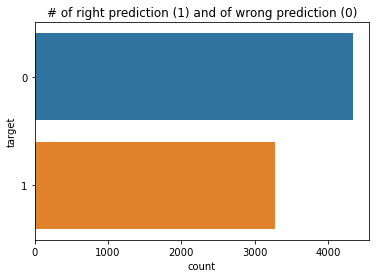

In [6]:
print('# of samples in train = ', train_data.id.unique().shape[0])
sns.countplot(y='target',data=train_data).set_title('# of right prediction (1) and of wrong prediction (0)')
print('# of samples in test = ', test_data.id.unique().shape[0])


In [7]:
print('# of samples with location in train = ', train_data.location.notnull().sum())
print('# of unique location in train = ', train_data.location.unique().shape[0])
print('# of NaN location in train = ', train_data.location.isnull().sum())
print('  ')
print('# of samples with location in test = ', test_data.location.notnull().sum())
print('# of unique location in test = ', test_data.location.unique().shape[0])
print('# of NaN location in test = ', test_data.location.isnull().sum())

# of samples with location in train =  5080
# of unique location in train =  3342
# of NaN location in train =  2533
  
# of samples with location in test =  2158
# of unique location in test =  1603
# of NaN location in test =  1105


In [8]:
print('# of samples with keyword in train = ', train_data.keyword.notnull().sum())
print('# of unique keyword in train = ', train_data.keyword.unique().shape[0])
print('# of NaN keyword in train = ', train_data.keyword.isnull().sum())
print('  ')
print('# of samples with keyword in test = ', test_data.keyword.notnull().sum())
print('# of unique keyword in test = ', test_data.keyword.unique().shape[0])
print('# of NaN keyword in test = ', test_data.keyword.isnull().sum())

# of samples with keyword in train =  7552
# of unique keyword in train =  222
# of NaN keyword in train =  61
  
# of samples with keyword in test =  3237
# of unique keyword in test =  222
# of NaN keyword in test =  26


I think 'keyword' and 'location' are not so important. But I am trying to impute NaN values and then use them.

In [53]:
imputer=SimpleImputer(strategy='most_frequent')
imputer.fit(train_data.drop(columns=['target','id','text']))

SimpleImputer(strategy='most_frequent')

In [54]:
X_imputed=imputer.transform(train_data.drop(columns=['target','id','text']))

In [55]:
train_data_imputed=pd.DataFrame(X_imputed, columns =(train_data.drop(columns=['target','id','text']).columns))
train_data_imputed.head()

,keyword,location
0,fatalities,USA
1,fatalities,USA
2,fatalities,USA
3,fatalities,USA
4,fatalities,USA


### Load the Target

In [51]:
y = train_data['target']

### Extract features from text

In [52]:
import nltk
import string
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer, PorterStemmer
from nltk.tokenize import word_tokenize
import string 

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/leptone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
my_stopwords=(stopwords.words('english'))+["'d", "'ll", "'m", "'re", "'s", "'ve", 'ai', 'ca', "n't", 'sha', 'wo']

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        tokens = word_tokenize(articles)
        tokens = [i for i in tokens if i not in my_stopwords]
        tokens = [self.wnl.lemmatize(t) for t in tokens]
        #print (tokens)
        return tokens

    
class StemTokenizer(object):
    def __init__(self):
        self.wnl = PorterStemmer()
    def __call__(self, articles):
        tokens = word_tokenize(articles)
        tokens = [i for i in tokens if i not in my_stopwords]
        tokens = [self.wnl.stem(t) for t in tokens]
        #print (tokens)
        return tokens


In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/leptone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
def extract_text(mess):
    new_mess=''
    text = str(mess)
    clean = re.sub(r'''[,.;@#?:!&$*"']+ \ * '''," ", text, flags=re.VERBOSE)
    new_mess +=''.join(clean)
    return new_mess

In [18]:
tweets= train_data['text']
tweets=tweets.apply(extract_text)
tweets= train_data['text'].to_numpy()
cntvec = CountVectorizer(tokenizer=StemTokenizer(),analyzer='word',stop_words=my_stopwords)
C = cntvec.fit_transform(tweets)
tfidf = TfidfTransformer(sublinear_tf=True)

/home/leptone/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [19]:
X_text = tfidf.fit_transform(C)

In [20]:
X_text.shape

(7613, 19978)

Just try to remove features with zero variance

In [21]:
from sklearn.feature_selection import VarianceThreshold
interval=np.arange(0.9990,1,0.000001)
features=[]
for portion in interval:
    sel = VarianceThreshold(threshold=portion*(1-portion))
    X_text_fs=sel.fit_transform(X_text)
    features.append(X_text_fs.shape[1])

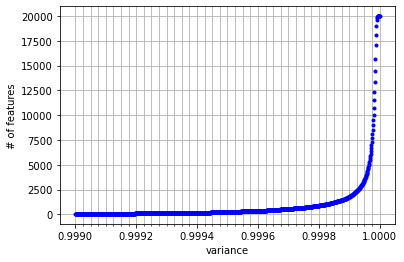

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(interval,features,'b.')
plt.xlabel('variance')
plt.ylabel('# of features')
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0.9990,1,0.0002)
minor_ticks = np.arange(0.9990,1,0.000025)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='both')

plt.show()

It is not the right way. Let's try Recursive feature elimination with cross-validation.

Optimal number of features : 8478


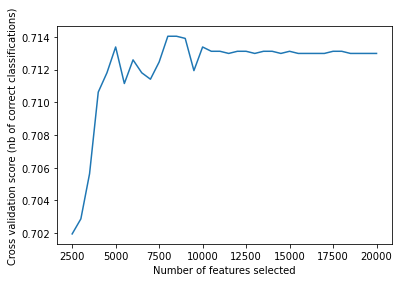

In [23]:

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 2500  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=500, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_text, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(np.arange(min_features_to_select,
               len(rfecv.grid_scores_)*500 + min_features_to_select,500),
         rfecv.grid_scores_)
plt.show()

In [24]:
X_text_fs=rfecv.transform(X_text)

In [25]:
X_text_fs.shape

(7613, 8478)

In [56]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_lockey=enc.fit_transform(X_imputed)
X_lockey.shape

(7613, 3562)

In [57]:
import scipy as scp

In [58]:
X_tot=scp.sparse.hstack([X_lockey,X_text_fs]).toarray()

In [59]:
X_tot.shape

(7613, 12040)

### Model selection

In [30]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,ComplementNB

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_tot,y,random_state=42)

In [32]:
mm=training(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  33 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-3)]: Done  50 out of  50 | elapsed:  2.1min finished


best score =  0.8001389078618779
best parameters =  {'C': 100.0}


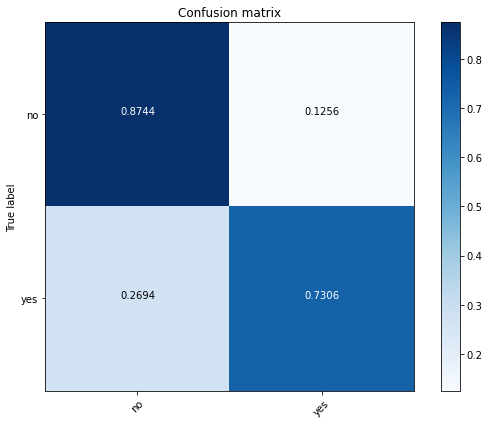

In [33]:
target_names=['no','yes']
predic = mm.predict(X_test)
confm = confusion_matrix(y_test, predic,normalize='true')
plot_confusion_matrix(confm,target_names)

In [34]:
print(metrics.classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1091
           1       0.81      0.73      0.77       813

    accuracy                           0.81      1904
   macro avg       0.81      0.80      0.81      1904
weighted avg       0.81      0.81      0.81      1904



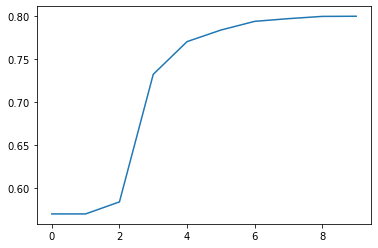

In [35]:
plt.plot(mm.cv_results_['mean_test_accuracy_score'])

In [36]:
best_gb=mm.best_estimator_
best_gb.fit(X_tot,y)
scores=cross_val_score(best_gb, X_tot,y, cv=10,scoring=make_scorer(accuracy_score))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.53 (+/- 0.24)


In [70]:
#NEXT STEPS
# ----
# Add Naive bayes
# Try to remove keyword and location or only location
# Try only with keyword
# Lemming
# wordtovec -- doctovec?

# Test

In [63]:
X_test_imputed=imputer.transform(test_data.drop(columns=['id','text']))
X_test_lockey =enc.transform(X_test_imputed)
X_test_lockey.shape

(3263, 3562)

In [64]:
tweets_test = test_data['text']
tweets_test = tweets_test.apply(extract_text)
tweets_test = test_data['text'].to_numpy()
C_test      = cntvec.transform(tweets_test)
X_text_test = tfidf.transform(C_test)

In [65]:
X_text_fs_test = rfecv.transform(X_text_test)

In [66]:
X_tot_test=scp.sparse.hstack([X_test_lockey,X_text_fs_test]).toarray()

In [68]:
y_pred = best_gb.predict(X_tot_test)
solution = pd.DataFrame({"id":test_data.id.unique(), "target":y_pred})
solution.head(20)
solution.to_csv("solution_lr.csv", index=False)


In [69]:
!kaggle competitions submit -c nlp-getting-started -f solution_lr.csv -m "logistic regression with location and keyword imputed (simple), and stemming on text and rfecv on texts"


100%|██████████████████████████████████████| 22.2k/22.2k [00:03<00:00, 7.17kB/s]
Successfully submitted to Natural Language Processing with Disaster Tweets